In [1]:
import pandas as pd

calo_hits = pd.read_parquet('data/parquet/reco/calo_hits/hard_scatter.ttbar.v1.reco.calo_hits.events0-9.parquet')
calo_hits = calo_hits.explode([col for col in calo_hits.columns if col != 'event_id'])
tracker_hits = pd.read_parquet('data/parquet/reco/tracker_hits/hard_scatter.ttbar.v1.reco.tracker_hits.events0-9.parquet')
tracker_hits = tracker_hits.explode([col for col in tracker_hits.columns if col != 'event_id'])
tracks = pd.read_parquet('data/parquet/reco/tracks/hard_scatter.ttbar.v1.reco.tracks.events0-9.parquet')
tracks = tracks.explode([col for col in tracks.columns if col != 'event_id'])
particles = pd.read_parquet('data/parquet/truth/particles/hard_scatter.ttbar.v1.truth.particles.events0-9.parquet')
particles = particles.explode([col for col in particles.columns if col != 'event_id'])

(-1.0, 1.0)

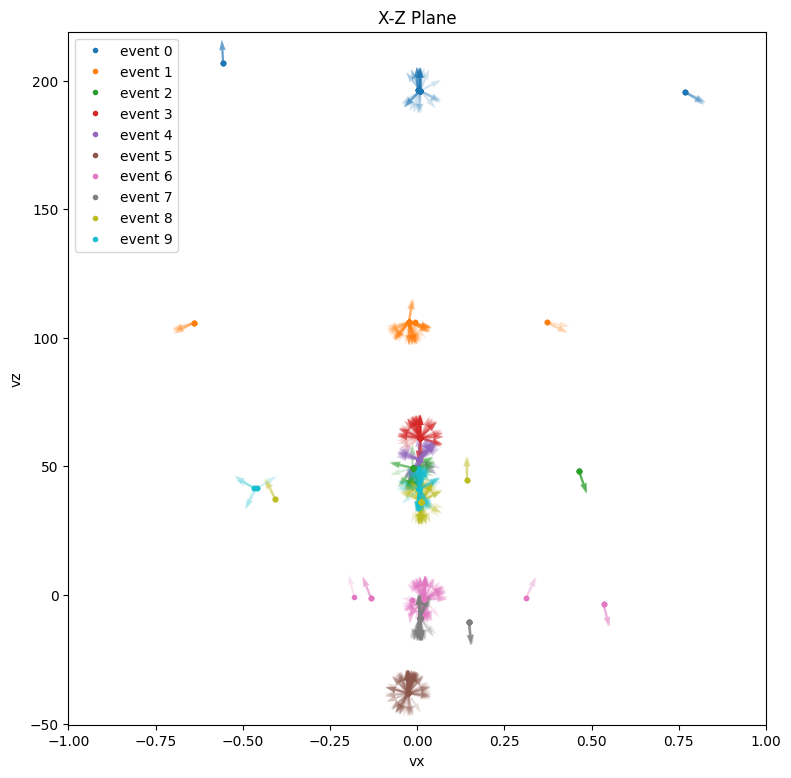

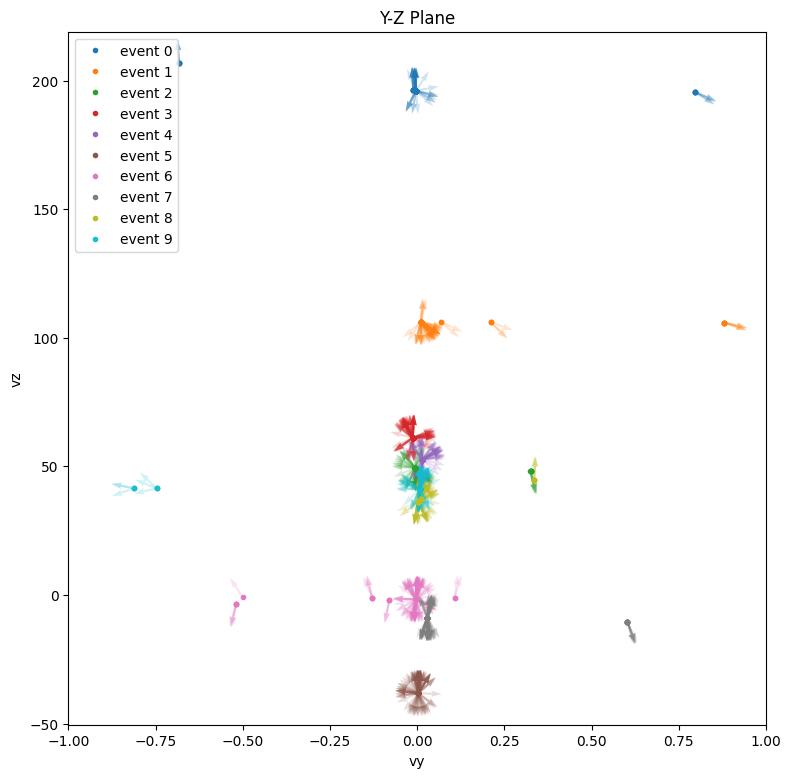

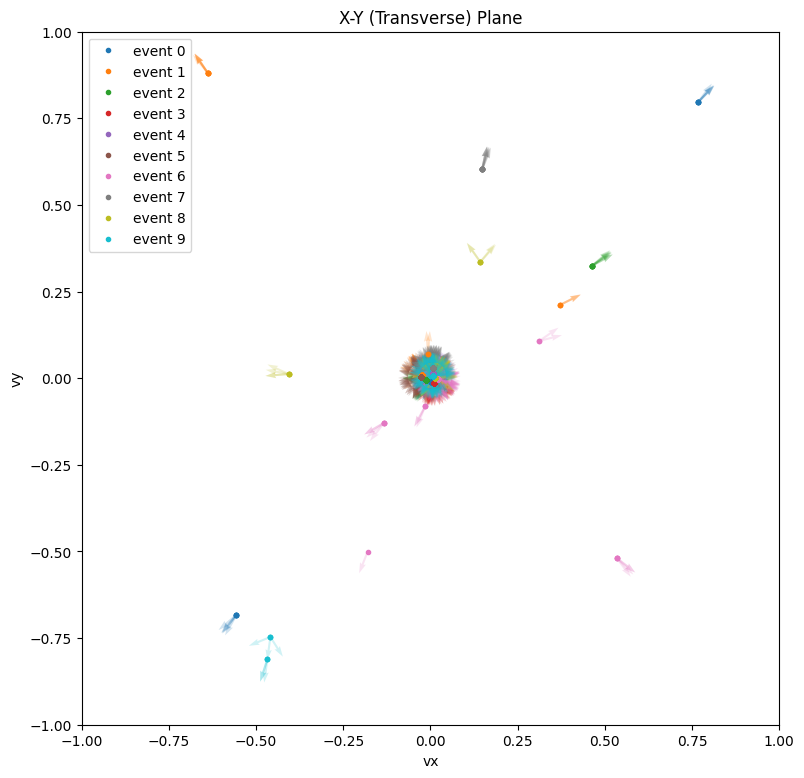

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# setting figures
fig_x,ax_x = plt.subplots(figsize=(9,9))
fig_y,ax_y = plt.subplots(figsize=(9,9))
fig_b,ax_b = plt.subplots(figsize=(9,9))

ax_x.set_xlabel('vx')
ax_x.set_ylabel('vz')
ax_x.set_title('X-Z Plane')

ax_y.set_xlabel('vy')
ax_y.set_ylabel('vz')
ax_y.set_title('Y-Z Plane')

ax_b.set_xlabel('vx')
ax_b.set_ylabel('vy')
ax_b.set_title('X-Y (Transverse) Plane')

for n in range(10):

    # get data for single event
    particles_event = particles[particles['event_id'] == n].copy()

    # turn values into a float
    for col in ['px', 'py', 'pz', 'vx', 'vy', 'vz']:
        particles_event[col] = pd.to_numeric(particles_event[col], errors='coerce')
    
    # applying conditions we talked about on the call
    particles_event = particles_event[abs(particles_event['vx']) < 1]
    particles_event = particles_event[abs(particles_event['vy']) < 1]
    particles_event['pT'] = np.sqrt(particles_event['px']**2 + particles_event['py']**2)
    particles_event = particles_event[particles_event['pT'] > 1]

    # plotting the vertex position data for x and z
    line_x = ax_x.plot(particles_event['vx'],particles_event['vz'],'.',label=f'event {n}')
    color_x = line_x[0].get_color()
    # getting the momentum magnitude
    p_mag_x = np.sqrt(particles_event['px']**2 + particles_event['pz']**2)
    # normalising the momemtums
    px_norm = particles_event['px'] / p_mag_x
    pz_norm = particles_event['pz'] / p_mag_x
    # drawing the momentums for each particle as an arrow 
    ax_x.quiver(particles_event['vx'], particles_event['vz'], px_norm, pz_norm,
                pivot='tail', scale=30, width=0.003, alpha=0.2, color=color_x)

    # plotting the vertex position data for y and z
    line_y = ax_y.plot(particles_event['vy'],particles_event['vz'],'.',label=f'event {n}')
    color_y = line_y[0].get_color()
    # getting the momentum magnitude
    p_mag_y = np.sqrt(particles_event['py']**2 + particles_event['pz']**2)
    # normalising the momemtums
    py_norm = particles_event['py'] / p_mag_y
    pz_norm = particles_event['pz'] / p_mag_y
    # drawing the momentums for each particle as an arrow 
    ax_y.quiver(particles_event['vy'], particles_event['vz'], py_norm, pz_norm,
                pivot='tail', scale=30, width=0.003, alpha=0.2,color = color_y)
    
    # plotting the vertex position data for x and y
    line_b = ax_b.plot(particles_event['vx'],particles_event['vy'],'.',label=f'event {n}')
    color_b = line_b[0].get_color()
    # normalising the momemtums
    px_norm = particles_event['px'] / particles_event['pT']
    py_norm = particles_event['py'] / particles_event['pT']
    # drawing the momentums for each particle as an arrow 
    ax_b.quiver(particles_event['vx'], particles_event['vy'], px_norm, py_norm,
                pivot='tail', scale=30, width=0.003, alpha=0.2,color=color_b)

ax_x.legend()
ax_x.set_xlim(-1, 1) # Set limits to focus on the vertex

ax_y.legend()
ax_y.set_xlim(-1, 1) # Set limits to focus on the vertex

ax_b.legend()
ax_b.set_xlim(-1, 1) # Set limits for a square plot
ax_b.set_ylim(-1, 1)